<a href="https://colab.research.google.com/github/DurgaBhavana/5731Submissions/blob/master/In_class_exercise_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

In [71]:
# IMPORT REQUIRED LIBRARIES
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [72]:
# READ CSV FILE
data_df = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')

In [73]:
# NUMBER OF OBSERVATIONS
print("Shape: {0}".format(data_df.shape))

Shape: (413840, 6)


In [74]:
cluster_data_df = data_df.head(1000)
cluster_data_df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
995,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,It's a decent for the price.. I've had this on...,0.0
996,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,Is good cell phone,0.0
997,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,"Amazing phone. Cables and case included, also ...",0.0
998,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,Excelent,0.0


In [75]:
# PRE PROCESSING

# Special characters removal
cluster_data_df['After noise removal'] = cluster_data_df['Reviews'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

# Punctuation removal
cluster_data_df['Punctuation removal'] = cluster_data_df['After noise removal'].str.replace('[^\w\s]','')

# Remove numbers
cluster_data_df['Remove numbers'] = cluster_data_df['Punctuation removal'].str.replace('\d+', '')

# Stopwords removal
stop_word = stopwords.words('english')
cluster_data_df['Stopwords removal'] = cluster_data_df['Remove numbers'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_word))

# Lower Casing
cluster_data_df['Lower casing'] = cluster_data_df['Stopwords removal'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Tokenization
cluster_data_df['Tokenization'] = cluster_data_df['Lower casing'].apply(lambda x: TextBlob(x).words)

# Stemming
st = PorterStemmer()
cluster_data_df['Stemming'] = cluster_data_df['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))

# Lemmatization
cluster_data_df['Lemmatization'] = cluster_data_df['Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
cluster_data_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased,Very pleased,Very pleased,Very pleased,very pleased,"[very, pleased]",veri pleas,veri plea
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good goes slow sometimes good phone I...,it works good goes slow sometimes good phone i...,"[it, works, good, goes, slow, sometimes, good,...",it work good goe slow sometim good phone i love,it work good goe slow sometim good phone i love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone replace lost phone The thing volum...,great phone replace lost phone the thing volum...,"[great, phone, replace, lost, phone, the, thin...",great phone replac lost phone the thing volum ...,great phone replac lost phone the thing volum ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,It's a decent for the price.. I've had this on...,0.0,It s a decent for the price I ve had this on...,It s a decent for the price I ve had this on...,It s a decent for the price I ve had this on...,It decent price I one months The cons I pretty...,it decent price i one months the cons i pretty...,"[it, decent, price, i, one, months, the, cons,...",it decent price i one month the con i pretti f...,it decent price i one month the con i pretti f...
996,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,Is good cell phone,0.0,Is good cell phone,Is good cell phone,Is good cell phone,Is good cell phone,is good cell phone,"[is, good, cell, phone]",is good cell phone,is good cell phone
997,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,"Amazing phone. Cables and case included, also ...",0.0,Amazing phone Cables and case included also ...,Amazing phone Cables and case included also ...,Amazing phone Cables and case included also ...,Amazing phone Cables case included also screen...,amazing phone cables case included also screen...,"[amazing, phone, cables, case, included, also,...",amaz phone cabl case includ also screen pritec...,amaz phone cabl case includ also screen pritec...
998,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,Excelent,0.0,Excelent,Excelent,Excelent,Excelent,excelent,[excelent],excel,excel


# K - means using TFIDF

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(cluster_data_df['Lemmatization'].values)
tfidf.shape

(1000, 2483)

In [77]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 10, n_jobs = -1,random_state=99)
model_tf.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [78]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_
cluster_center_tf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00044339, 0.00109302, 0.00746944, ..., 0.00648556, 0.00169077,
        0.00070448],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02834208, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [79]:
# to understand what kind of words generated as columns by BOW
terms1 = tfidf_vect.get_feature_names()

In [80]:
terms1[1:10]

['abil',
 'abl',
 'ablebto',
 'about',
 'absolut',
 'abysm',
 'accent',
 'accept',
 'access']

In [81]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')
silhouette_score_tf

0.08767419501657137

In [82]:
# Giving Labels/assigning a cluster to each point/text 
df1 = cluster_data_df
df1['Tfidf Clus Label'] = model_tf.labels_
df1.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...,3
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Very pleased,Very pleased,Very pleased,Very pleased,very pleased,"[very, pleased]",veri pleas,veri plea,3
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good goes slow sometimes good phone I...,it works good goes slow sometimes good phone i...,"[it, works, good, goes, slow, sometimes, good,...",it work good goe slow sometim good phone i love,it work good goe slow sometim good phone i love,9
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone replace lost phone The thing volum...,great phone replace lost phone the thing volum...,"[great, phone, replace, lost, phone, the, thin...",great phone replac lost phone the thing volum ...,great phone replac lost phone the thing volum ...,8


In [83]:
# How many points belong to each cluster ->

df1.groupby(['Tfidf Clus Label'])['Reviews'].count()

Tfidf Clus Label
0     12
1    189
2     52
3    351
4     21
5     33
6     47
7     62
8    172
9     61
Name: Reviews, dtype: int64

In [84]:
#Refrence credit - to find the top 10 features of cluster centriod

print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: bueno
 muy
 excelent
 bien
 excelet
 gracia
 form
 forth
 freez
 freeli
Cluster 1: phone
 it
 the
 use
 like
 screen
 review
 card
 camera
 good
Cluster 2: excel
 product
 recommend
 seller
 thank
 phone
 fash
 function
 five
 cellphon
Cluster 3: phone
 great
 good
 use
 expect
 it
 the
 like
 product
 thank
Cluster 4: ok
 far
 wcdma
 it
 quit
 peopl
 someon
 buy
 slow
 phone
Cluster 5: excelent
 telefono
 producto
 zip
 foundat
 freedom
 free
 freak
 frame
 fraction
Cluster 6: love
 phone
 great
 use
 my
 like
 mom
 it
 easi
 buy
Cluster 7: work
 bad
 item
 the
 it
 phone
 great
 die
 so
 put
Cluster 8: phone
 work
 great
 charg
 call
 would
 return
 the
 sim
 card
Cluster 9: good
 veri
 phone
 product
 price
 buy
 tank
 thank
 mobil
 recomend


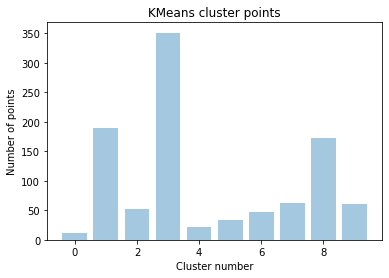

In [85]:
# visually how points or reviews are distributed across 10 clusters 

import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df1.groupby(['Tfidf Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [88]:
# Reading a review which belong to each group.

for i in range(10):
    print("4 review of assigned to cluster ", i)
    print("-" * 70)
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][5]]['Reviews'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][10]]['Reviews'])
    print('\n')
    print("_" * 70)

4 review of assigned to cluster  0
----------------------------------------------------------------------
MUY BUENO


muy bien


excelente muy bueno


______________________________________________________________________
4 review of assigned to cluster  1
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!


Just... not good. The phone has great screen resolution, storage is low, you need an SD card to do anything. May have a clear ESN but don't expect to use it with things like Freedompop.


Nokia Asha 302 Unlocked GSM Phone with 3.2MP Camera, Video, QWERTYDependableTraditional Nokia Menu'sNot Com

# K-means - Method 2

In [90]:
# Generating bag of words features.
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(cluster_data_df['Reviews'].values)
bow.shape

(1000, 3455)

In [91]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++', n_jobs = -1,random_state=99)
model.fit(bow)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [92]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [93]:
from sklearn import metrics
print(metrics.silhouette_score(bow, labels, metric='euclidean'))

0.396624076509732


In [95]:
cluster_data_df['Bow Clus Label'] = model.labels_ # the last column you can see the label numebers
cluster_data_df.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label,Bow Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...,1,5
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...,3,0


# DBSCAN clustering

In [105]:
from sklearn.cluster import DBSCAN
import numpy as np

In [106]:
# Computing 200th Nearest neighbour distance
minPts = 2 * 100
# Lower bound function copied from -> https://gist.github.com/m00nlight/0f9306b4d4e61ba0195f
def lower_bound(nums, target): # This function return the number in the array just greater than or equal to itself.
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): # Returns the distance of 200th nearest neighbour.
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) # computing distances.
        if (len(dists) == 200 and dists[199] > dist): # If distance is larger than current largest distance found.
          l = int(lower_bound(dists, dist)) # Using the lower bound function to get the right position.
          if l < 200 and l >= 0 and dists[l] > dist:
              dists[l] = dist
        else:
          dists.append(dist)
          dists.sort()
    
    return dists[199] # Dist 199 contains the distance of 200th nearest neighbour.

In [162]:
list_of_sent_train = list()

for i in cluster_data_df["Lower casing"].values:
  list_of_sent_train.append(i.split())

In [167]:
import gensim
w2v_model=gensim.models.Word2Vec(list_of_sent_train, size=100, workers=4)

In [170]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
count = 1
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =1; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)

In [171]:
# Computing the 200th nearest neighbour distance of some point the dataset:
twohundrethneigh = []
for val in sent_vectors[:300]:
    twohundrethneigh.append(compute200thnearestneighbour(val, sent_vectors[:300]) )
twohundrethneigh.sort()

In [172]:
# Training DBSCAN :
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=200, n_jobs=-1, p=None)

In [173]:
cluster_data_df['AVG-W2V Clus Label'] = model.labels_
cluster_data_df.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label,Bow Clus Label,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...,1,5,0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...,3,0,0


# Hierarchical Clustering

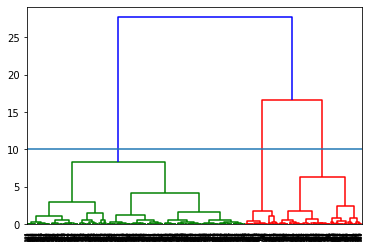

In [175]:
import scipy
from scipy.cluster import hierarchy
dendro = hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method = 'ward'))
plt.axhline(y = 10) # cut at 30 to get 5 clusters

In [176]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
Agg=cluster.fit_predict(sent_vectors)

In [177]:
# Giving Labels/assigning a cluster to each point/text 
aggdfa = cluster_data_df
aggdfa['AVG-W2V Clus Label'] = cluster.labels_
aggdfa.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label,Bow Clus Label,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...,1,5,0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...,3,0,0


In [179]:
# How many points belong to each cluster ->
aggdfa.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0    414
1    238
2    100
3     93
4    155
Name: Reviews, dtype: int64

In [181]:
# Reading a review which belong to each group.
for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

2 reviews of assigned to cluster  0
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!


nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung


______________________________________________________________________
2 reviews of assigned to cluster  1
----------------------------------------------------------------------
It works good but it goes slow sometimes but its a very good phone I love it


Great phone to replace my lost phone. The 

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering. 

 Compare K means, DBSCAN and Hierarchical clustering.

 K - means:
 K-means is more efficient with large datasets but does not work efficiently with noisy data.

 DBSCAN:
 DBSCAN is not efficient with large datasets but works efficiently with noisy data.

 Hierarchical Clustering:
 Hierarchical clustering is not efficient with hyper spherical shaped clusters.

